# Problem Statement

Build an image tagging Deep Learning model that can help the company classify these images into eight categories of Indian classical dance.

In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/identify-the-dance-form/test.csv
/kaggle/input/identify-the-dance-form/train.csv
/kaggle/input/identify-the-dance-form/test/33.jpg
/kaggle/input/identify-the-dance-form/test/414.jpg
/kaggle/input/identify-the-dance-form/test/11.jpg
/kaggle/input/identify-the-dance-form/test/217.jpg
/kaggle/input/identify-the-dance-form/test/375.jpg
/kaggle/input/identify-the-dance-form/test/196.jpg
/kaggle/input/identify-the-dance-form/test/301.jpg
/kaggle/input/identify-the-dance-form/test/349.jpg
/kaggle/input/identify-the-dance-form/test/170.jpg
/kaggle/input/identify-the-dance-form/test/275.jpg
/kaggle/input/identify-the-dance-form/test/216.jpg
/kaggle/input/identify-the-dance-form/test/194.jpg
/kaggle/input/identify-the-dance-form/test/291.jpg
/kaggle/input/identify-the-dance-form/test/358.jpg
/kaggle/input/identify-the-dance-form/test/390.jpg
/kaggle/input/identify-the-dance-form/test/256.jpg
/kaggle/input/identify-the-dance-form/test/280.jpg
/kaggle/input/identify-the-dance-form/te

## Importing Required Libraries[](http://)

In [113]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
import random
from shutil import copyfile

Reading the train and test directory containing images and csv files containing images names and labels

In [114]:
train_dir = '/kaggle/input/identify-the-dance-form/train'
test_dir = '/kaggle/input/identify-the-dance-form/train'
train_csv = pd.read_csv(r'/kaggle/input/identify-the-dance-form/train.csv')
test_csv = pd.read_csv(r'/kaggle/input/identify-the-dance-form/test.csv')

In [115]:
train_csv.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


## Preparing Data for training

Making the required directories for flow_from_directory command

Making source directory with 8 sub categories named as the 8 dance forms given in the train.csv file to keep all the images present in the train directory provided for the competition

Similarly, Making training directory with 8 sub categories named as the 8 dance forms given in the train.csv file to keep the images used for training after the splitting of train and validation images

Similarly, Making testing directory with 8 sub categories named as the 8 dance forms given in the train.csv file to keep the images used for validation after the splitting of train and validation images

Making tests directory with sub directory unknown to contain test directory images for predict_generator

In [116]:
os.mkdir(r'/kaggle/working/identify-dance-form')
os.mkdir(r'/kaggle/working/identify-dance-form/training')
os.mkdir(r'/kaggle/working/identify-dance-form/testing')
os.mkdir(r'/kaggle/working/identify-dance-form/source')
os.mkdir(r'/kaggle/working/identify-dance-form/training/manipuri')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/manipuri')
os.mkdir(r'/kaggle/working/identify-dance-form/source/manipuri')
os.mkdir(r'/kaggle/working/identify-dance-form/training/bharatanatyam')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/bharatanatyam')
os.mkdir(r'/kaggle/working/identify-dance-form/source/bharatanatyam')
os.mkdir(r'/kaggle/working/identify-dance-form/training/odissi')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/odissi')
os.mkdir(r'/kaggle/working/identify-dance-form/source/odissi')
os.mkdir(r'/kaggle/working/identify-dance-form/training/kathakali')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/kathakali')
os.mkdir(r'/kaggle/working/identify-dance-form/source/kathakali')
os.mkdir(r'/kaggle/working/identify-dance-form/training/kathak')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/kathak')
os.mkdir(r'/kaggle/working/identify-dance-form/source/kathak')
os.mkdir(r'/kaggle/working/identify-dance-form/training/sattriya')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/sattriya')
os.mkdir(r'/kaggle/working/identify-dance-form/source/sattriya')
os.mkdir(r'/kaggle/working/identify-dance-form/training/kuchipudi')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/kuchipudi')
os.mkdir(r'/kaggle/working/identify-dance-form/source/kuchipudi')
os.mkdir(r'/kaggle/working/identify-dance-form/training/mohiniyattam')
os.mkdir(r'/kaggle/working/identify-dance-form/testing/mohiniyattam')
os.mkdir(r'/kaggle/working/identify-dance-form/source/mohiniyattam')
os.mkdir('/kaggle/working/identify-dance-form/tests')
os.mkdir('/kaggle/working/identify-dance-form/tests/unknown')

FileExistsError: [Errno 17] File exists: '/kaggle/working/identify-dance-form'

Reading the jpg files from the train directory and saving their names in the list named files

In [117]:
files = []
for  r, d, f in os.walk(train_dir):
    for file in f:
        if '.jpg' in file:
            files.append(file)

One of the images from train directory

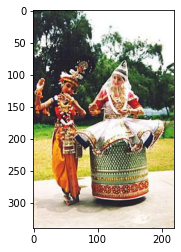

In [118]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(os.path.join(train_dir,files[0])))

Copying images from the train directory to the Source directory's sub folders based on the labels of the images provided in train.csv file

In [119]:
for x in files:
    if (train_csv[train_csv['Image'] == x]['target'] == 'odissi').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/odissi/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'manipuri').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/manipuri/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'bharatanatyam').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/bharatanatyam/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'kathakali').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/kathakali/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'kathak').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/kathak/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'sattriya').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/sattriya/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'kuchipudi').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/kuchipudi/',x)
        copyfile(train_temp, final_train)
    elif (train_csv[train_csv['Image'] == x]['target'] == 'mohiniyattam').bool():
        train_temp = os.path.join(train_dir,x)
        final_train = os.path.join('/kaggle/working/identify-dance-form/source/mohiniyattam/',x)
        copyfile(train_temp, final_train)

Defining the function for splitting the Source Diretory images into training and testing(validation) directories 

In [120]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    shuffle=random.sample(os.listdir(SOURCE),len(os.listdir(SOURCE)))
    train_data_length=int(len(os.listdir(SOURCE))*SPLIT_SIZE)
    test_data_length=int(len(os.listdir(SOURCE))-train_data_length)
    train_data=shuffle[0:train_data_length]
    test_data=shuffle[-test_data_length:]
    for x in train_data:
        train_temp=os.path.join(SOURCE,x)
        final_train=os.path.join(TRAINING,x)
        copyfile(train_temp,final_train)
    for x in test_data:
        test_temp=os.path.join(SOURCE,x)
        final_test=os.path.join(TESTING,x)
        copyfile(test_temp,final_test)

In [121]:
bhatanatyam_source_dir = '/kaggle/working/identify-dance-form/source/bharatanatyam/'
bhatanatyam_training_dir = '/kaggle/working/identify-dance-form/training/bharatanatyam/'
bhatanatyam_testing_dir = '/kaggle/working/identify-dance-form/testing/bharatanatyam/'

kathak_source_dir = '/kaggle/working/identify-dance-form/source/kathak/'
kathak_training_dir = '/kaggle/working/identify-dance-form/training/kathak/'
kathak_testing_dir = '/kaggle/working/identify-dance-form/testing/kathak/'

kathakali_source_dir = '/kaggle/working/identify-dance-form/source/kathakali/'
kathakali_training_dir = '/kaggle/working/identify-dance-form/training/kathakali/'
kathakali_testing_dir = '/kaggle/working/identify-dance-form/testing/kathakali/'

kuchipudi_source_dir = '/kaggle/working/identify-dance-form/source/kuchipudi/'
kuchipudi_training_dir = '/kaggle/working/identify-dance-form/training/kuchipudi/'
kuchipudi_testing_dir = '/kaggle/working/identify-dance-form/testing/kuchipudi/'

manipuri_source_dir = '/kaggle/working/identify-dance-form/source/manipuri/'
manipuri_training_dir = '/kaggle/working/identify-dance-form/training/manipuri/'
manipuri_testing_dir = '/kaggle/working/identify-dance-form/testing/manipuri/'

mohiniyattam_source_dir = '/kaggle/working/identify-dance-form/source/mohiniyattam/'
mohiniyattam_training_dir = '/kaggle/working/identify-dance-form/training/mohiniyattam/'
mohiniyattam_testing_dir = '/kaggle/working/identify-dance-form/testing/mohiniyattam/'

odissi_source_dir = '/kaggle/working/identify-dance-form/source/odissi/'
odissi_training_dir = '/kaggle/working/identify-dance-form/training/odissi/'
odissi_testing_dir = '/kaggle/working/identify-dance-form/testing/odissi/'

sattriya_source_dir = '/kaggle/working/identify-dance-form/source/sattriya/'
sattriya_training_dir = '/kaggle/working/identify-dance-form/training/sattriya/'
sattriya_testing_dir = '/kaggle/working/identify-dance-form/testing/sattriya/'

Splitting the Source Diretory images into training and testing(validation) sub directories 

In [122]:
split_size = 0.85
split_data(bhatanatyam_source_dir, bhatanatyam_training_dir, bhatanatyam_testing_dir, split_size)
split_data(sattriya_source_dir, sattriya_training_dir, sattriya_testing_dir, split_size)
split_data(odissi_source_dir, odissi_training_dir, odissi_testing_dir, split_size)
split_data(mohiniyattam_source_dir, mohiniyattam_training_dir, mohiniyattam_testing_dir, split_size)
split_data(manipuri_source_dir, manipuri_training_dir, manipuri_testing_dir, split_size)
split_data(kuchipudi_source_dir, kuchipudi_training_dir, kuchipudi_testing_dir, split_size)
split_data(kathakali_source_dir, kathakali_training_dir, kathakali_testing_dir, split_size)
split_data(kathak_source_dir, kathak_training_dir, kathak_testing_dir, split_size)

Importing VGG16 Model for Pre-training

In [123]:

from tensorflow.keras.applications.vgg16 import VGG16


Initializing VGG16 Model

In [124]:
pre_trained_model = VGG16(include_top = False,
                            input_shape = (156,156,3),
                            weights = '/kaggle/input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [125]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 156, 156, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 156, 156, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 156, 156, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 78, 78, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 78, 78, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 78, 78, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 39, 39, 128)       0     

Setting the layers of pre trained model to be trainable

In [126]:
pre_trained_model.trainable = True

print(len(pre_trained_model.layers))

19


### Fine Tuning the VGG16 Model

In [127]:
fine_tune_at = 19

Making some of the layers non-trainable of the VGG16 Model

In [128]:
for layer in pre_trained_model.layers[:fine_tune_at]:
    layer.trainable = False

In [129]:
last_output = pre_trained_model.output

Adding some layers to implement VGG16 Model to fit well on our Dataset

In [130]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(8, activation = 'softmax')(x)

## Model Formation

In [131]:
model = tf.keras.Model(pre_trained_model.input, x)

In [132]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 156, 156, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 156, 156, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 156, 156, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 78, 78, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 78, 78, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 78, 78, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 39, 39, 128)       0   

Initializing ImageDataGenerator and applying **Image Augmentation**

In [133]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = "/kaggle/working/identify-dance-form/training"
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(156,156),
                                                   color_mode = 'rgb',
                                                   batch_size=32,
                                                   class_mode='categorical')

VALIDATION_DIR = "/kaggle/working/identify-dance-form/testing"
validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                   target_size=(156,156),
                                                   color_mode = 'rgb',
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 356 images belonging to 8 classes.
Found 110 images belonging to 8 classes.


Initializing the Model

In [134]:
model.compile(tf.keras.optimizers.Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['acc'])

AttributeError: module 'tensorflow_core.keras.optimizers' has no attribute 'ADAM'

Initializing the Callback

In [135]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

Fitting the Model

In [136]:
history = model.fit_generator(train_generator,
                              epochs=40,
                              verbose=1,
                              validation_data=validation_generator,
                             callbacks = [learning_rate_reduction])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

Graphical Comparison of Training and validation - accuracy and loss

In [ ]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['acc'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_acc'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

Reading the jpg files from the test directory and saving their names in the list named files

## Predicting the test images labels and preparing submission file

In [137]:
fil = []
for  r, d, f in os.walk(test_dir):
    for file in f:
        if '.jpg' in file:
            fil.append(file)

One of the images from train directory

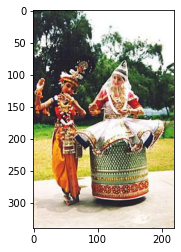

In [138]:
plt.imshow(mpimg.imread(os.path.join(test_dir,fil[0])))

Copying images from the train directory to the tests directory - to prepare it for predict_generator function

In [139]:
for x in fil:
    train_temp = os.path.join(test_dir,x)
    final_train = os.path.join('/kaggle/working/identify-dance-form/tests/unknown',x)
    copyfile(train_temp, final_train)

In [140]:
tests_dir = '/kaggle/working/identify-dance-form/tests'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(tests_dir,
                                                  target_size = (156,156),
                                                  color_mode = 'rgb',
                                                  batch_size=32,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=42)

Found 364 images belonging to 1 classes.


Saving train images names in img_list

In [141]:
img_list = []
for x in test_generator.filenames:
    x = x.split('/')[1]
    img_list.append(x)

Making prediction on test images using predict_trainer

In [142]:
predictions = model.predict_generator(test_generator)

Converting the probabalities we got from softmax layers into the integer labels

In [143]:
predicted_clases = np.argmax(predictions,axis=-1)

Class Indices assigned to the sub classes by the train_generator

In [144]:
train_generator.class_indices

{'bharatanatyam': 0,
 'kathak': 1,
 'kathakali': 2,
 'kuchipudi': 3,
 'manipuri': 4,
 'mohiniyattam': 5,
 'odissi': 6,
 'sattriya': 7}

Creating a DataFrame with the image name and the predicted image label

In [145]:
data = {'Image': img_list, 'target': predicted_clases}

In [146]:
df = pd.DataFrame(data)
df.head()

,Image,target
0,1.jpg,3
1,10.jpg,7
2,100.jpg,7
3,101.jpg,6
4,102.jpg,7


Mapping back the class indices with the class label name

In [147]:
df['target']= df['target'].map({0: 'bharatanatyam',
                                1: 'kathak',
                                2: 'kathakali',
                                3: 'kuchipudi',
                                4: 'manipuri',
                                5: 'mohiniyattam',
                                6: 'odissi',
                                7: 'sattriya'})

In [148]:
df.head()

,Image,target
0,1.jpg,kuchipudi
1,10.jpg,sattriya
2,100.jpg,sattriya
3,101.jpg,odissi
4,102.jpg,sattriya


Exporting csv file for submission

In [149]:
df.to_csv(r'submission_dance.csv', index = False)

# If You like it DO UPVOTE